In [3]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.13/site-packages/pandas/core/computation/expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.10.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
df = pd.read_csv('insurance_data_lapsebin.csv')

In [5]:
df.columns

Index(['CHANNEL1', 'CHANNEL2', 'CHANNEL3', 'ENTRY AGE', 'SEX', 'POLICY TYPE 1',
       'POLICY TYPE 2', 'POLICY TYPE 3', 'PAYMENT MODE', 'POLICY STATUS',
       'BENEFIT', 'NON LAPSE GUARANTEED', 'SUBSTANDARD RISK',
       'NUMBER OF ADVANCE PREMIUM', 'INITIAL BENEFIT', 'Full Benefit?',
       'Policy Year (Decimal)', 'Policy Year', 'Premium', 'Issue Date',
       'Current Policy Date', 'Lapse'],
      dtype='str')

In [3]:
df.head()

,CHANNEL1,CHANNEL2,CHANNEL3,ENTRY AGE,SEX,POLICY TYPE 1,POLICY TYPE 2,POLICY TYPE 3,PAYMENT MODE,POLICY STATUS,...,SUBSTANDARD RISK,NUMBER OF ADVANCE PREMIUM,INITIAL BENEFIT,Full Benefit?,Policy Year (Decimal),Policy Year,Premium,Issue Date,Current Policy Date,Lapse
0,1,1,1,36,F,1,1,A,Annually,Inforce,...,0.0,0,0.0,N,8.000000,9,280.0,2011-08-01,2019-08-01,0
1,1,1,1,42,M,1,2,A,Annually,Inforce,...,0.0,0,0.0,N,8.000000,9,200.0,2011-08-01,2019-08-01,0
2,1,1,2,40,M,2,3,A,Annually,Lapse,...,0.0,0,0.0,N,8.000000,9,1289.0,2011-08-01,2019-08-01,1
3,1,1,3,39,M,1,2,A,Monthly,Lapse,...,0.0,0,0.0,N,8.000000,9,216.0,2011-08-01,2019-08-01,1
4,1,1,4,44,M,1,2,A,Annually,Lapse,...,0.0,0,0.0,N,7.916667,8,140.0,2011-09-01,2019-08-01,1


# Benefit Structure Analysis

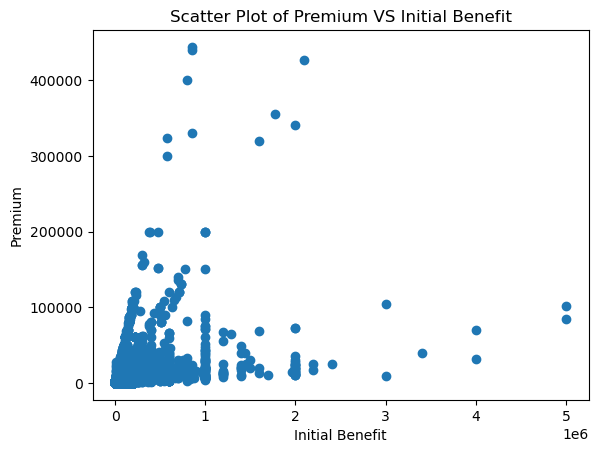

In [ ]:
# Create a scatterplot of Benefit vs. Initial Benefit
# Assess how closely initial benefit aligns with current/full benefit.

plt.scatter(df['INITIAL BENEFIT'], df['Premium'])

# Add labels and a title
plt.xlabel('Initial Benefit')
plt.ylabel('Premium')
plt.title('Scatter Plot of Premium VS Initial Benefit')

# Display the plot
plt.show()

# A lot of 0.0 Initial Benefit might means that this policies are supplemental
# It suggests a policy provides no payout despite often having a cost (Premium)

1. Initial Benefit
- The Initial Benefit refers to the original Face Amount or the total death benefit of the policy at the time it was issued.
- Purpose: This is the lump sum that the insurance company agrees to pay out upon the death of the insured.
- In your data: The provided sample shows values of 0.0 for this column. This typically indicates that for these specific records, the base death benefit may be tracked in a different column or that these are supplemental policies where the primary benefit is calculated differently.


2. Premium
- The Premium is the specific amount of money the policyholder must pay to keep the insurance policy active.
- Purpose: It is the "cost" of the insurance coverage.
- In your data: Premiums in your dataset vary significantly, ranging from 140.0 to 1289.0.
- Relationship to Lapse: The Payment Mode (e.g., Monthly vs. Annually) dictates how often this premium is due. Failing to pay this amount usually results in a Lapse status.


3. Full Benefit?
- The Full Benefit? column is a binary indicator (represented as Y or N) that specifies if the policy is currently eligible for its maximum payout.
- Purpose: It indicates whether any "waiting periods" or "graded benefit" periods have ended. Some policies only pay a fraction of the death benefit if the insured dies within the first few years of the policy.
- In your data: All visible rows in your sample are marked as N. This suggests these policies may still be in a restricted benefit period or have specific contractual limitations preventing them from being classified as "Full Benefit" yet.

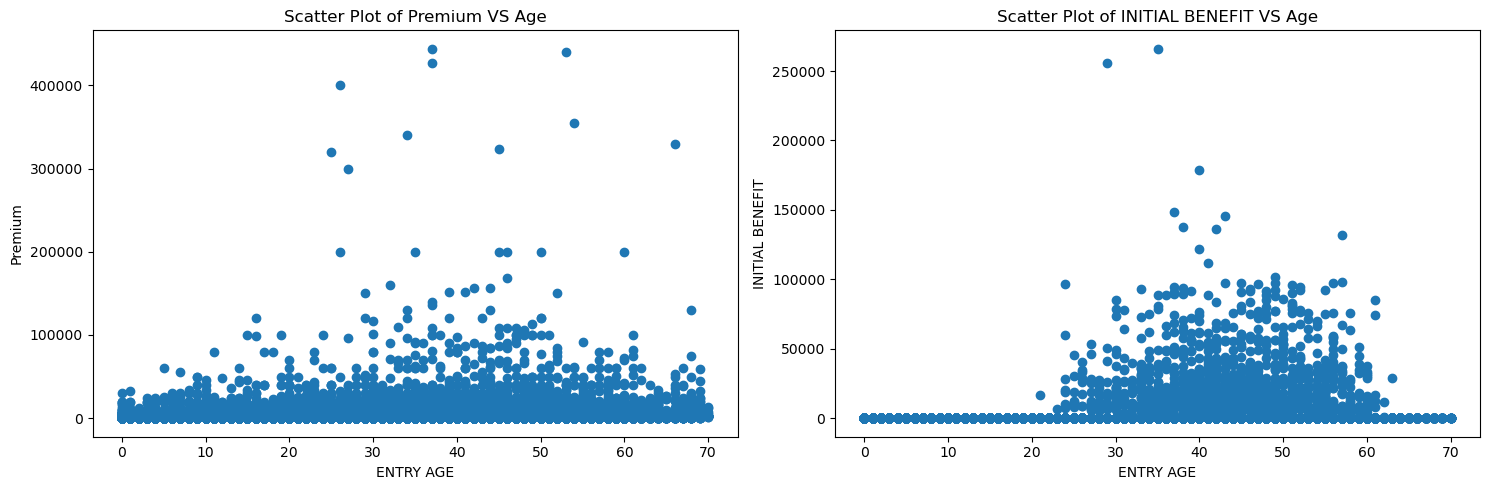

In [14]:
# 1. Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Entry Age VS Premium
axes[0].scatter(df['ENTRY AGE'], df['Premium'])

# Use set_ methods to add labels to that specific axis
axes[0].set_xlabel('ENTRY AGE')
axes[0].set_ylabel('Premium')
axes[0].set_title('Scatter Plot of Premium VS Age')

# Entry Age VS INITIAL BENEFIT
axes[1].scatter(df['ENTRY AGE'], df['INITIAL BENEFIT'])

# Use set_ methods to add labels to that specific axis
axes[1].set_xlabel('ENTRY AGE')
axes[1].set_ylabel('INITIAL BENEFIT')
axes[1].set_title('Scatter Plot of INITIAL BENEFIT VS Age')

# 4. Display the plot
plt.tight_layout()
plt.show()

# Lapse Rate Analysis

<Axes: xlabel='Lapse', ylabel='ENTRY AGE'>

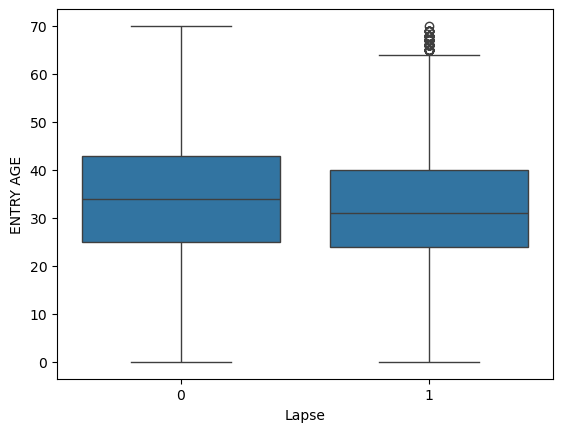

In [ ]:
# Plot Lapse rate by Entry Age
sns.boxplot(data=df, x='Lapse', y='ENTRY AGE')

In [18]:
df.columns

Index(['CHANNEL1', 'CHANNEL2', 'CHANNEL3', 'ENTRY AGE', 'SEX', 'POLICY TYPE 1',
       'POLICY TYPE 2', 'POLICY TYPE 3', 'PAYMENT MODE', 'POLICY STATUS',
       'BENEFIT', 'NON LAPSE GUARANTEED', 'SUBSTANDARD RISK',
       'NUMBER OF ADVANCE PREMIUM', 'INITIAL BENEFIT', 'Full Benefit?',
       'Policy Year (Decimal)', 'Policy Year', 'Premium', 'Issue Date',
       'Current Policy Date', 'Lapse'],
      dtype='object')

<Axes: xlabel='NUMBER OF ADVANCE PREMIUM', ylabel='ENTRY AGE'>

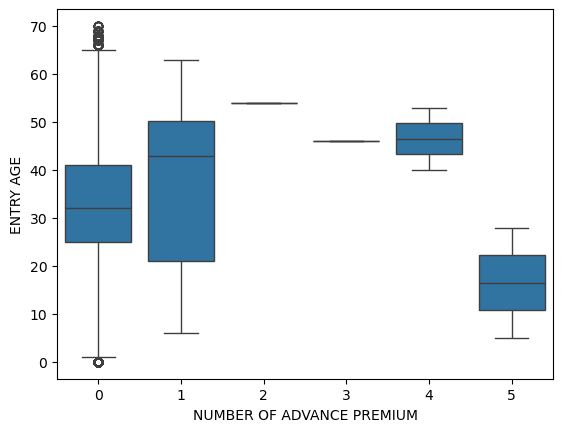

In [ ]:
# Plot Entry Age by NUmber of Advance Premiu
sns.boxplot(data=df, x='NUMBER OF ADVANCE PREMIUM', y='ENTRY AGE')

- Most Common Entry Age (0 Advance Premiums): For policyholders with no advance premiums, the median entry age is approximately 32 years. This group shows the widest range of entry ages, including outliers as young as 0 and as old as 70.

- Older Entry Ages for Moderate Advance Payments: Policyholders who pay 1 to 4 advance premiums generally have higher median entry ages, ranging between 42 and 55 years.

- Youngest Entry Ages for High Advance Payments: Policyholders who pay 5 advance premiums represent the youngest median entry age group, centered at approximately 18 years. The entry ages for this group are more tightly clustered, generally falling between 10 and 28 years.

General Trend: There is no simple linear correlation between these variables. Instead, mid-life policyholders (ages 40–60) seem more likely to pay a moderate amount of advance premiums (1–4), while the youngest policyholders are the most likely to pay the maximum number of observed advance premiums (5).

<Axes: xlabel='SUBSTANDARD RISK', ylabel='ENTRY AGE'>

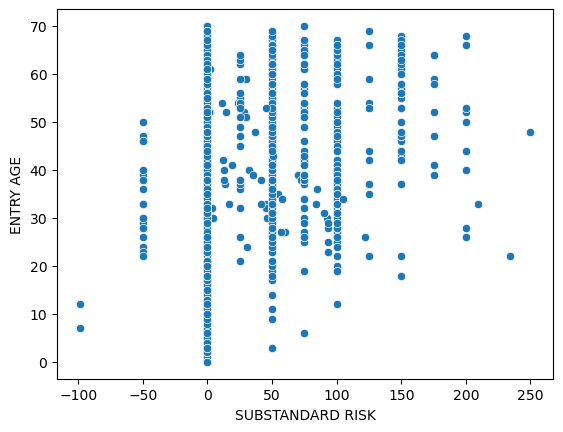

In [23]:
# Plot Risk by Entry Age
sns.scatterplot(data=df, x='SUBSTANDARD RISK', y='ENTRY AGE')